# Praca domowa nr 1, Warsztaty Badawcze ML 2



## Jędrzej Sokołowski, 10.03.2022

## Wczytanie danych oraz potrzebnych pakietów

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

student_df = pd.read_csv("students.csv")

## Wstęp

Poniższy raport przedstawia eksplorację zbioru danych pochodzącego ze strony: https://www.kaggle.com/uciml/student-alcohol-consumption. Zbiór ten dotyczy studentów, a dokładniej ich stylu życia. Zwiera informacje od historii edukacji rodziców, po dzienne spożycie alkoholu. Ekploracja skupi się na determinowaniu zależności między różnymi zmiennymi a uzyskiwanymi ocenami.

## Zapoznanie z danymi

Rozważany zbiór, posiada 1044 obserwacje, oraz nie zawiera żadnych braków.

In [2]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

Wśród 33 zmiennych, jest 16 ilościowych oraz 18 jakościowych. W zmiennych ilościowych, 12 z nich jest pewnego rodzaju skalą lub ma bardzo mały zakres.

In [3]:
cols = student_df.columns
num_cols = student_df._get_numeric_data().columns
non_num_cols = list(set(cols) - set(num_cols))

In [4]:
print(len(num_cols))
student_df[num_cols].head()

16


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [5]:
print(len(non_num_cols))
student_df[non_num_cols].head()

18


,class,address,Fjob,higher,paid,Mjob,activities,nursery,school,famsup,reason,guardian,famsize,Pstatus,romantic,internet,sex,schoolsup
0,math,U,teacher,yes,no,at_home,no,yes,GP,no,course,mother,GT3,A,no,no,F,yes
1,math,U,other,yes,no,at_home,no,no,GP,yes,course,father,GT3,T,no,yes,F,no
2,math,U,other,yes,yes,at_home,no,yes,GP,no,other,mother,LE3,T,no,yes,F,yes
3,math,U,services,yes,yes,health,yes,yes,GP,yes,home,mother,GT3,T,yes,yes,F,no
4,math,U,other,yes,yes,other,no,yes,GP,yes,home,father,GT3,T,no,no,F,no


### Opis zmiennych

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>sex - student's sex (binary: 'F' - female or 'M' - male)<br>age - student's age (numeric: from 15 to 22)<br>address - student's home address type (binary: 'U' - urban or 'R' - rural)<br>famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)<br>Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br>guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br>traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>schoolsup - extra educational support (binary: yes or no)<br>famsup - family educational support (binary: yes or no)<br>paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>activities - extra-curricular activities (binary: yes or no)<br>nursery - attended nursery school (binary: yes or no)<br>higher - wants to take higher education (binary: yes or no)<br>internet - Internet access at home (binary: yes or no)<br>romantic - with a romantic relationship (binary: yes or no)<br>famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>health - current health status (numeric: from 1 - very bad to 5 - very good)<br>absences - number of school absences (numeric: from 0 to 93)<br><br>These grades are related with the course subject, Math or Portuguese:<br><br>G1 - first period grade (numeric: from 0 to 20)<br>G2 - second period grade (numeric: from 0 to 20)<br>G3 - final grade (numeric: from 0 to 20, output target)

### Pierwsze i ostatnie wiersze

In [6]:
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portuguese


### Podstawowy opis statystyczny zmiennych numerycznych

In [7]:
student_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Rozkłady zmiennych ilościowych

Spośród nich, 12 można uznać za kategoryczne, dlatego zostały wykorzystane do nich inne wykresy.

array([[<AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>],
       [<AxesSubplot:title={'center':'G2'}>,
        <AxesSubplot:title={'center':'G3'}>]], dtype=object)

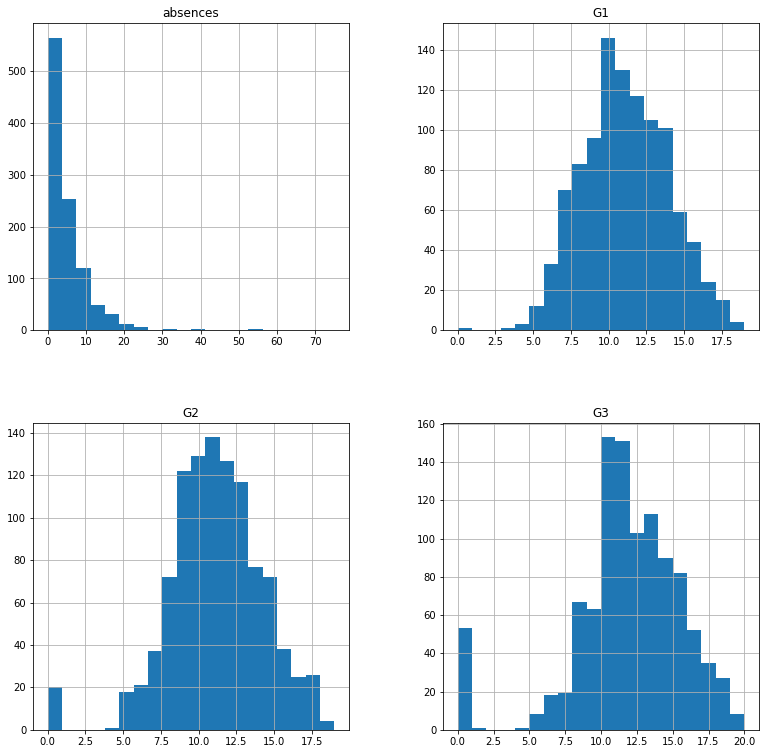

In [8]:
cols = ["absences", "G1", "G2", "G3"]

student_df.hist(cols, bins=20, figsize=(13,13))

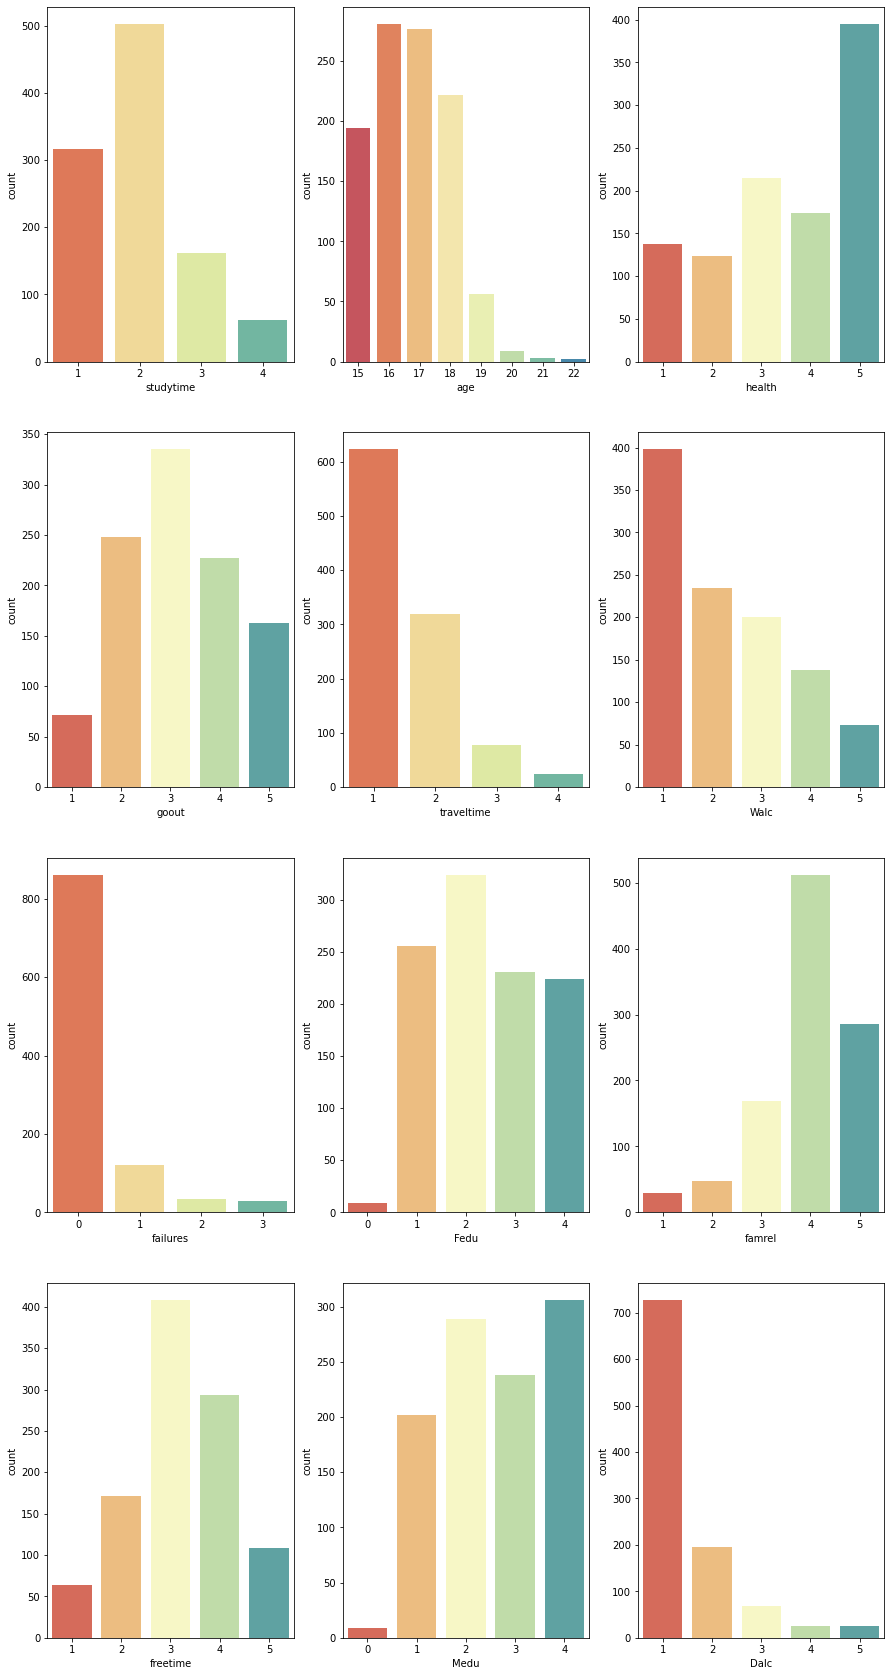

In [9]:
col_names = list(set(num_cols) - set(cols))

fig, axes = plt.subplots(4,3, figsize = (15, 30))

for col, ax in zip(col_names, axes.flatten()):
    sns.countplot(x=col, data=student_df, ax=ax, palette="Spectral")

## Rozkłady zmiennych kategorycznych

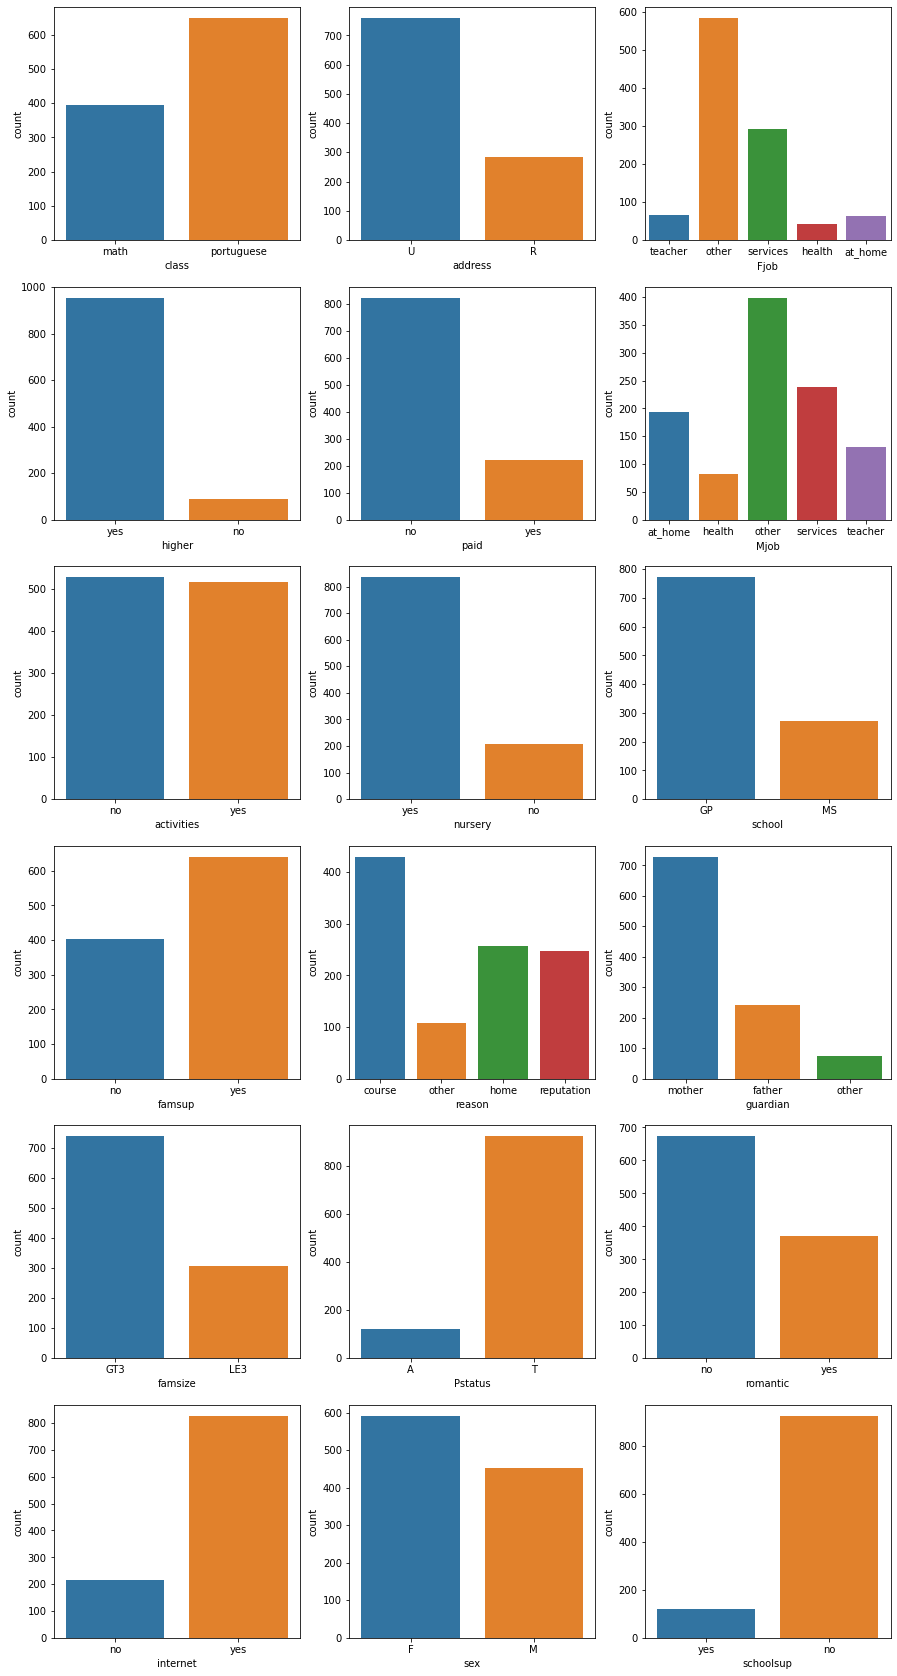

In [10]:
fig, axes = plt.subplots(6,3, figsize = (15, 30))

for col, ax in zip(non_num_cols, axes.flatten()):
    sns.countplot(x=col, data=student_df, ax=ax)

## Weekendowe spożywanie alkoholu a otrzymywane oceny

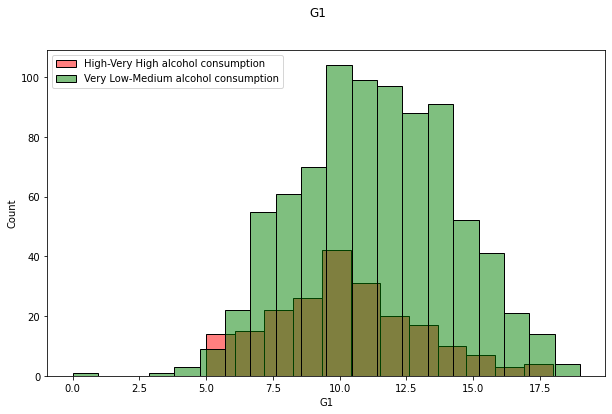

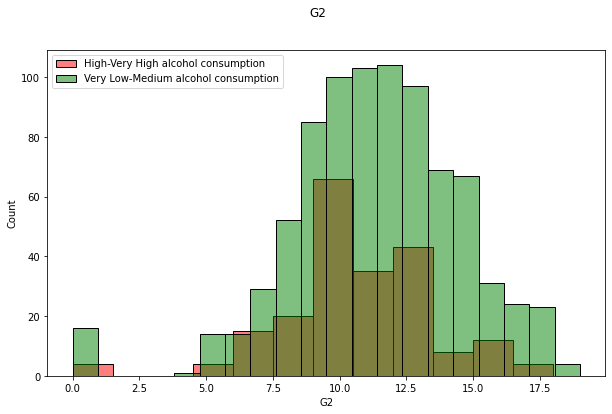

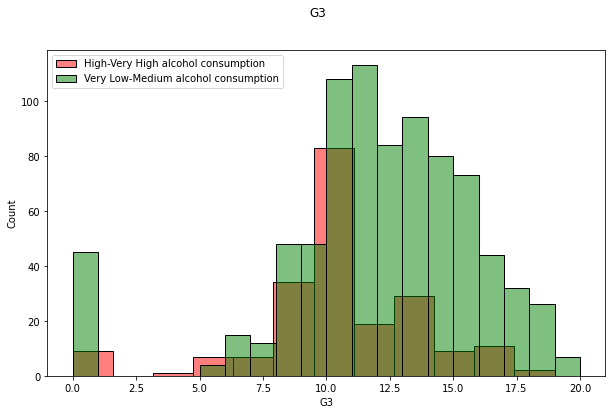

In [11]:
exams = ["G1", "G2", "G3"]


for exam in exams:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.histplot(student_df[student_df["Walc"] > 3][exam], bins=12, alpha=0.5, color="red", label="High-Very High alcohol consumption", ax=ax)
    sns.histplot(student_df[student_df["Walc"] <= 3][exam], bins=20, alpha=0.5, color="green", label="Very Low-Medium alcohol consumption", ax=ax)
    fig.suptitle(f"{exam}")
    ax.legend()
plt.show()


Wygląda na to, że spożywanie alkoholu w weekendy przez studentów nie wpływa znacząco na otrzymywane przez nich oceny.

## Boxploty wybranych zmiennych z rozbiciem na dzienne spożycie alkoholu

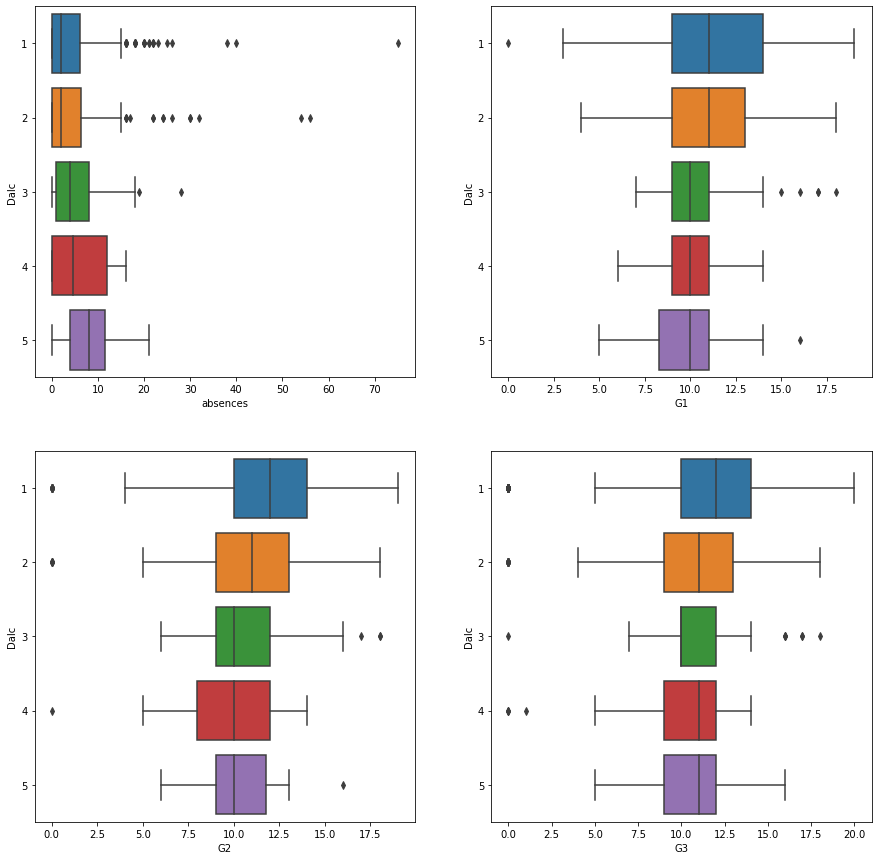

In [12]:
col_names = ["absences", "G1", "G2", "G3"]

fig, axes = plt.subplots(2,2, figsize=(15,15))

for col, ax in zip(col_names, axes.flatten()):

    sns.boxplot(x=col, y= "Dalc", orient="h", data=student_df, ax=ax)



Z otrzymanych wykresów możemy zobaczyć, że średnio wybrany student spożywający codziennie dużo alkoholu powinien mieć więcej nieobecności. Podobnie, mniej pijący studenci, zwykle otrzymują trochę lepsze oceny.

## Spożycie alkoholu a płeć

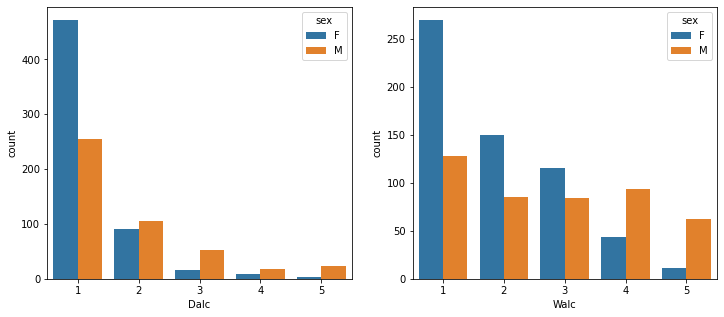

In [13]:
col_names = ["Dalc", "Walc"]

fig, axes = plt.subplots(1,2, figsize = (12,5))

for col, ax in zip(col_names, axes.flatten()):
    sns.countplot(x=col, data=student_df, hue="sex", ax=ax)

Możemy zauważyć, że w przypadku spożywania alkoholu w tygodniu, większość studentów preferuje małe ilości i niezależnie od płci wraz z wrostem zmiennej *Dalc* maleje liczba studentów. Dla picia w weekendy, sytuacja jest podobna dla kobiet, ale inna dla mężczyzn, dla których rozkład jest o wiele bardziej równomierny. 

## Oceny końcowe a płeć

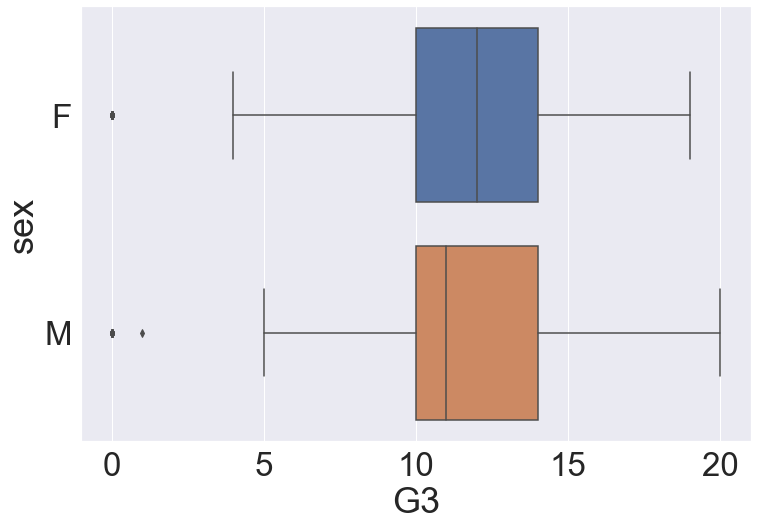

In [14]:
plt.figure(figsize=(12,8))
sns.set(font_scale=3)
sns.boxplot(x="G3", y= "sex", orient="h", data=student_df)

plt.show()

## Zależności między zmiennymi

<AxesSubplot:>

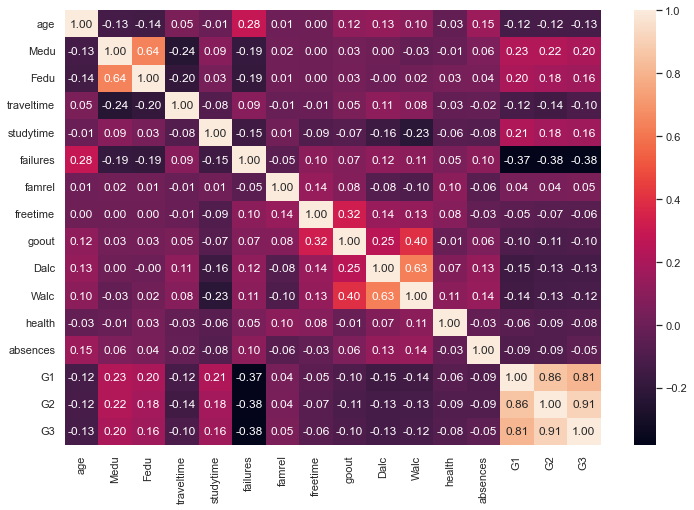

In [16]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
corr = student_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")

### Zmienna *failures* oraz oceny

Nic dziwnego, że ilość poprzednio niezdanych przedmiotów wpływa na wysokość ocen. Współczynnik korelacji tej zmiennej z każdą oceną wynosi około -0.38

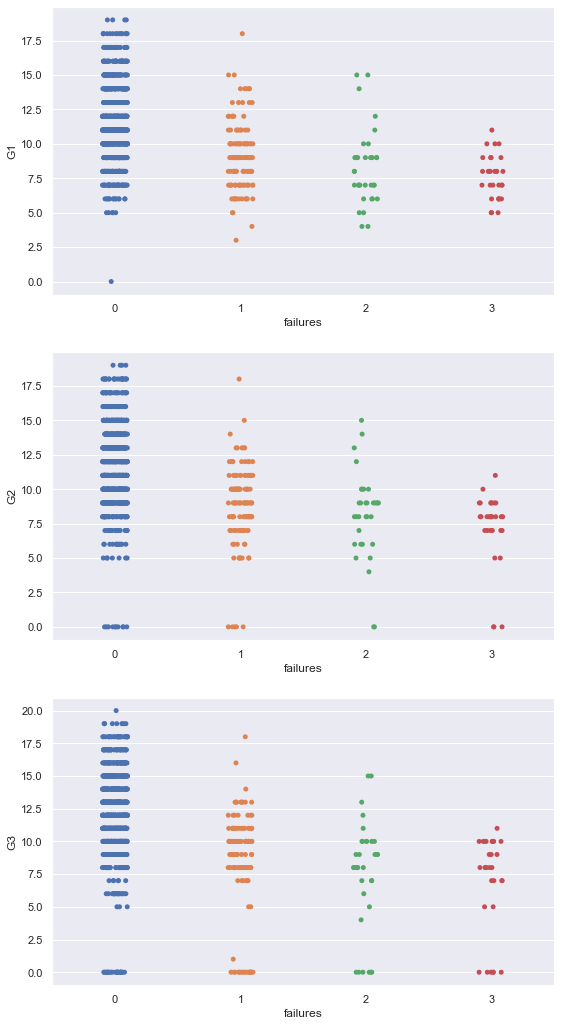

In [17]:
col_names = ["G1", "G2", "G3"]

fig, axes = plt.subplots(3,1, figsize = (9,18))

for col, ax in zip(col_names, axes.flatten()):
    sns.stripplot(y=col,x="failures", data=student_df, ax=ax)

Sugerując się powyższymi wykresami możemy wnioskować, że osoby które w poprzednim roku nie zdały jakiejś liczby przedmiotów będą średnio miały słabsze oceny.

### Oceny z pierwszych dwóch semestrów a ocena końcowa

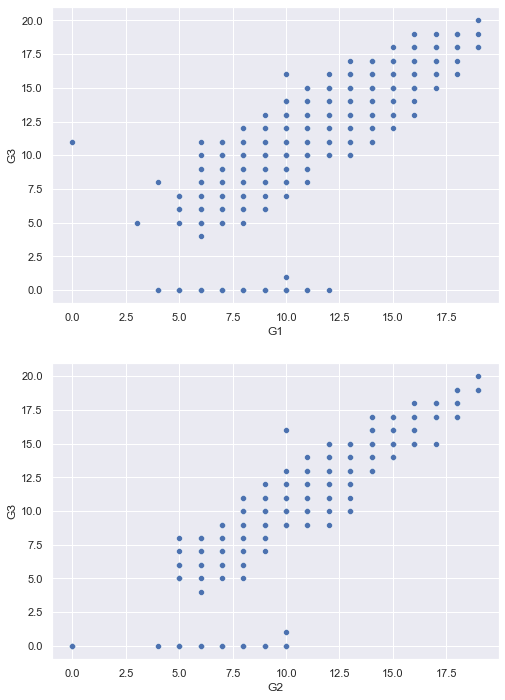

In [18]:
col_names = ["G1", "G2"]

fig, axes = plt.subplots(2,1, figsize = (8,12))

for col, ax in zip(col_names, axes.flatten()):
    sns.scatterplot(x=col, y="G3", data=student_df, ax=ax)

Między ocenami z pierwszych semestrów a oceną końcową naturalnie jest bardzo silna dodatnia zależność, współczynniki korelacji początkowych semestrów wynoszą kolejno 0.81 i 0.91. Korelację tą również widzimy na wykresach. 

### Ilość alkoholu spożywanego w weekendy a spotykanie się ze znajomymi

Mało kto lubi pić samemu, stąd między zmienną *Walc* i *goout* również istnieje dodatnia zależność, współczynnik kolreacji tych zmiennych wynosi 0.40.

<AxesSubplot:xlabel='Walc', ylabel='count'>

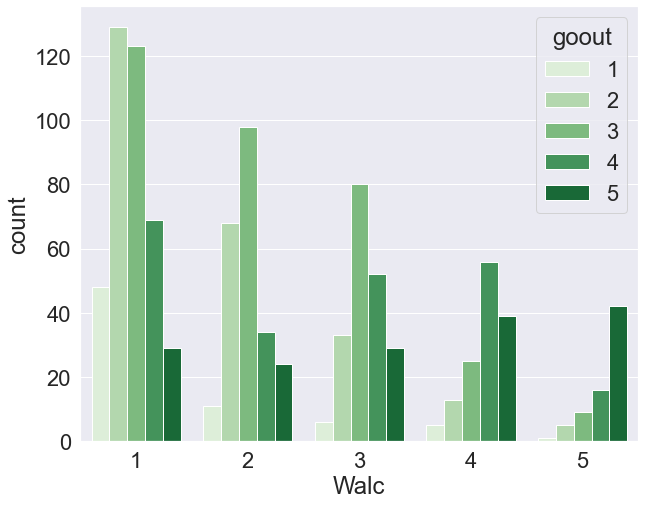

In [19]:
sns.set(font_scale=2)
plt.figure(figsize=(10,8))

sns.countplot(x="Walc",hue="goout", palette="Greens", data=student_df)

Na wykresie możemy zobaczyć, że wraz w wzrostem zmiennej *Walc* coraz większą część studentów stanowią ci, którzy najwięcej spotykają się ze znajomymi.

### Ilość alkoholu spożywanego w weekendy a czas nauki

Spożywanie alkoholu z pewnością zabiera studentom dużo czasu, stąd między zmienna *Dalc* i *studytime* jest ujemna zależność. Współczynnik korelacji wynosi -0.23

<AxesSubplot:xlabel='Walc', ylabel='count'>

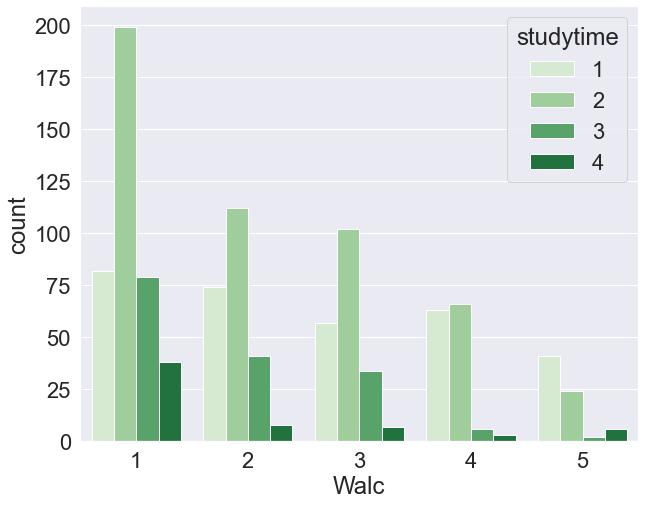

In [20]:
sns.set(font_scale=2)
plt.figure(figsize=(10,8))

sns.countplot(x="Walc",hue="studytime", palette="Greens", data=student_df)

Wśród osób, posiadających wysokie lub bardzo wysokie spożycie alkoholu w weekendy jest bardzo mało takich, które dużo czasu poświęcają na naukę.

In [21]:
report = ProfileReport(student_df)
report.to_widgets()

Summarize dataset:   0%|          | 0/48 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Podsumowanie
Do wniosków otrzymanych z powyższej eksploracji można zaliczyć to, że weekendowe picie alkoholu nie wpływa znacząco na otrzymywane oceny. Generalnie studenci piją więcej od studentek, a zdanie wszystkich przedmiotów z pewnością sprawi, że następny rok nauki będzie łatwiejszy. Ponadto, warto się uczyć systematycznie, bo dobre oceny w całym roku, zwykle skutkują dobrą oceną końcową. 